<a href="https://colab.research.google.com/github/cheoneunjin/ecole_2/blob/main/Text_mining_project_2022_%E1%84%80%E1%85%A7%E1%86%BC%E1%84%89%E1%85%A5%E1%86%BC%E1%84%83%E1%85%A2_yamada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SNS crawling를 사용하고 데이터 수집


*   snscrape를 사용 (https://github.com/JustAnotherArchivist/snscrape)


In [1]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import itertools

Text Mining (English) Project Code

*   목표: 트위터 데이터를 수집하고 다양한 텍스트 분석 방법으로 분석하고 의미있는 결과를 얻자


*   Crawling
*   전처리
*   Word Cloud
*   감성분석
*   토픽분석









In [3]:
#검색하고 싶은 단어
search_word = "security"

#검색하는 기간
start_day = "2022-10-10"
end_day = "2022-10-12"

search_query = search_word + ' since:' + start_day + ' until:' + end_day 

#지정한 기간에서 검색하고 싶은 단어를 포함한 tweet를 취득
scraped_tweets = sntwitter.TwitterSearchScraper(search_query).get_items()

In [4]:
#처음부터 1000개의 tweets를 취득
sliced_scraped_tweets = itertools.islice(scraped_tweets, 1000)

In [5]:
#pandas DataFrame으로 변환
df = pd.DataFrame(sliced_scraped_tweets)

In [6]:
df

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/redeye11055/status/1579985...,2022-10-11 23:59:59+00:00,GOP planning 'catastrophic default' if Democra...,1579985195138097152,redeye11055,[https://l.smartnews.com/au9hB/GF3bgo],https://l.smartnews.com/au9hB/GF3bgo,[https://t.co/ddLEc6A9Pi],https://t.co/ddLEc6A9Pi
1,https://twitter.com/criticalthreats/status/157...,2022-10-11 23:59:59+00:00,Unobserved indications that the security force...,1579985194731573251,criticalthreats,[],,[],
2,https://twitter.com/Fuldraw/status/15799851905...,2022-10-11 23:59:58+00:00,@BinanceUS Security /utility dapps @EverRise,1579985190579240960,Fuldraw,[],,[],
3,https://twitter.com/criticalthreats/status/157...,2022-10-11 23:59:58+00:00,The concentration of security forces in #Kurdi...,1579985189505470465,criticalthreats,[https://www.criticalthreats.org/analysis/iran...,https://www.criticalthreats.org/analysis/iran-...,[https://t.co/nNp9Y0ADgB],https://t.co/nNp9Y0ADgB
4,https://twitter.com/TrishaF10942457/status/157...,2022-10-11 23:59:55+00:00,@MayoIsSpicyy I am so right there with you and...,1579985175093841920,TrishaF10942457,[],,[],
...,...,...,...,...,...,...,...,...,...
995,https://twitter.com/tgtrotter90/status/1579978...,2022-10-11 23:31:45+00:00,Modern #cloud security must address a sprawlin...,1579978088888545281,tgtrotter90,[https://dell.to/3yyG9iA],https://dell.to/3yyG9iA,[https://t.co/85KIrZv6xA],https://t.co/85KIrZv6xA
996,https://twitter.com/DrErika1/status/1579978084...,2022-10-11 23:31:44+00:00,"@joncoopertweets Free lunches for school kids,...",1579978084526460928,DrErika1,[],,[],
997,https://twitter.com/PassTheTe/status/157997806...,2022-10-11 23:31:40+00:00,@JohnFetterman isn't worried about getting hur...,1579978066822299648,PassTheTe,[https://twitter.com/RNCResearch/status/157841...,https://twitter.com/RNCResearch/status/1578410...,[https://t.co/H3BxK3lUPd],https://t.co/H3BxK3lUPd
998,https://twitter.com/whyTemper_/status/15799780...,2022-10-11 23:31:40+00:00,@JeffBuntin3 @Ol_Saint_Jerry @Cash_For_Cards @...,1579978065496911875,whyTemper_,[],,[],


# content에 keyword가 없고 username에 keyword가 있는 경우도 있어서 그런 경우를 제거하자

In [7]:
df = df[df['content'].str.contains('Security|SECURITY|SECURity|SeCurity|SECurity|securitY')]
df

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/redeye11055/status/1579985...,2022-10-11 23:59:59+00:00,GOP planning 'catastrophic default' if Democra...,1579985195138097152,redeye11055,[https://l.smartnews.com/au9hB/GF3bgo],https://l.smartnews.com/au9hB/GF3bgo,[https://t.co/ddLEc6A9Pi],https://t.co/ddLEc6A9Pi
2,https://twitter.com/Fuldraw/status/15799851905...,2022-10-11 23:59:58+00:00,@BinanceUS Security /utility dapps @EverRise,1579985190579240960,Fuldraw,[],,[],
4,https://twitter.com/TrishaF10942457/status/157...,2022-10-11 23:59:55+00:00,@MayoIsSpicyy I am so right there with you and...,1579985175093841920,TrishaF10942457,[],,[],
20,https://twitter.com/WomenHoldTheSky/status/157...,2022-10-11 23:59:14+00:00,"If Musk has a National Security clearance, can...",1579985002959634432,WomenHoldTheSky,[https://twitter.com/joshvisser/status/1579857...,https://twitter.com/joshvisser/status/15798573...,[https://t.co/SP9oX4qjcL],https://t.co/SP9oX4qjcL
24,https://twitter.com/OldSchool1919/status/15799...,2022-10-11 23:59:08+00:00,#BidenBorderCrisis\n#BorderCrisis\n#BidenDestr...,1579984978204508160,OldSchool1919,[https://www.westernjournal.com/watch-fox-news...,https://www.westernjournal.com/watch-fox-news-...,[https://t.co/eQHXrWxwav],https://t.co/eQHXrWxwav
...,...,...,...,...,...,...,...,...,...
947,https://twitter.com/MiguelANunezJr/status/1579...,2022-10-11 23:33:12+00:00,⁦@DOJPH⁩ to @SCOTUS Steer clear of Trump’s Ma...,1579978455004815360,MiguelANunezJr,[https://apple.news/AiTXKp5upRQ-HaZxIP2dMdg],https://apple.news/AiTXKp5upRQ-HaZxIP2dMdg,[https://t.co/o3z01II5MS],https://t.co/o3z01II5MS
961,https://twitter.com/KesudaStructure/status/157...,2022-10-11 23:32:58+00:00,FEATURES\n- Fitness Centre/GYM\n- Solar Soluti...,1579978395487961089,KesudaStructure,[],,[],
970,https://twitter.com/YAlnajjar/status/157997829...,2022-10-11 23:32:35+00:00,"""Google’s Pixel 7 and Pixel 7 Pro Pack New And...",1579978297064427520,YAlnajjar,[https://bit.ly/3rPh5Ac],https://bit.ly/3rPh5Ac,[https://t.co/M0GnT216lq],https://t.co/M0GnT216lq
975,https://twitter.com/nkzrdy_itWord/status/15799...,2022-10-11 23:32:28+00:00,IPsec(Security Architecture for Internet Proto...,1579978269356851200,nkzrdy_itWord,[],,[],


# 텍스트 데이터를 전처리

In [8]:
# df의 열 정보를 확인
df.columns

Index(['url', 'date', 'content', 'id', 'username', 'outlinks', 'outlinksss',
       'tcooutlinks', 'tcooutlinksss'],
      dtype='object')

In [9]:
#data frame에서 텍스트 데이터 열만 추출
df.content

0      GOP planning 'catastrophic default' if Democra...
2           @BinanceUS Security /utility dapps @EverRise
4      @MayoIsSpicyy I am so right there with you and...
20     If Musk has a National Security clearance, can...
24     #BidenBorderCrisis\n#BorderCrisis\n#BidenDestr...
                             ...                        
947    ⁦@DOJPH⁩ to @SCOTUS  Steer clear of Trump’s Ma...
961    FEATURES\n- Fitness Centre/GYM\n- Solar Soluti...
970    "Google’s Pixel 7 and Pixel 7 Pro Pack New And...
975    IPsec(Security Architecture for Internet Proto...
987    @joncoopertweets Fixing Social Security and Me...
Name: content, Length: 267, dtype: object

In [10]:
# 각 트위트의 특징을 확인
for tweet in df.content:
  print(tweet)

GOP planning 'catastrophic default' if Democrats refuse to cut Social Security and Medicare

Why don’t republicans understand that Medicare and Social Security is not a built in bank they can access anytime they want. It’s funded by workers and business.
 https://t.co/ddLEc6A9Pi
@BinanceUS Security /utility dapps @EverRise
@MayoIsSpicyy I am so right there with you and trying to figure out what I’m gonna do if they win! I depend solely on Social Security! I will be in the street! Along with every other elderly person that voted Republican! Huge blue wave please!
If Musk has a National Security clearance, can it be revoked please?  . . . something, something, conducting foreign policy without authorization. https://t.co/SP9oX4qjcL
#BidenBorderCrisis
#BorderCrisis
#BidenDestroysAmerica 

👎Democrats have No Answer
         Border NOT Secure 👎

Watch: Fox News Reporter Questions Democrats on Border Security, Their Silence Says It All https://t.co/eQHXrWxwav
@SomertonEm @PattiUSBLUE It's no

# 불요어(stop words)랑 불필요한 기호 등을 제거

In [12]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [15]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

불요어 추가

In [17]:
stop_words = stopwords.words('english')
print(stop_words)
stop_words.extend(["rt", 'sec', 'secure', 'Sec', 'SEC']) ###여기서  필요한 stopwords추가
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
import re
# 트위터분석을 위한 기본적인 텍스트 cleaning 함수
def CleanText(readData, Num=True, Eng=True):
    # Remove Retweets
    text = re.sub('RT @[\w_]+: ', '', readData)
    # Remove Mentions
    text = re.sub('@[\w_]+', '', text)
    # Remove or Replace URL
    text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", ' ',
                  text)  # http로 시작되는 url
    text = re.sub(r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{2,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", ' ',
                  text)  # http로 시작되지 않는 url
    # Remove only hashtag simbol "#" because hashtag contains huge information
    text = re.sub(r'#', ' ', text)
    # Remove Garbage Words (ex. &lt, &gt, etc)
    text = re.sub('[&]+[a-z]+', ' ', text)
    # Remove Special Characters
    text = re.sub('[^0-9a-zA-Zㄱ-ㅎ가-힣]', ' ', text)
    # Remove 출처 by yamada
    text = re.sub(r"(출처.*)", ' ', text)
    # Remove newline
    text = text.replace('\n', ' ')

    if Num is True:
        # Remove Numbers
        text = re.sub(r'\d+', ' ', text)

    if Eng is True:
        # Remove English
        text = re.sub('[a-zA-Z]', ' ', text)

    # Remove multi spacing & Reform sentence
    text = ' '.join(text.split())

    return text


tweet를 하나하나 불러오고 stopwords를 제거

In [19]:
cleaned_tweets_all = []

for tweet in df.content:
  cleaned_tweet = []
  cleaned_tweet_string = CleanText(tweet, Num=True, Eng=False)
  tweet_tokens = word_tokenize(cleaned_tweet_string)
  for token in tweet_tokens:
    if token.lower() not in stop_words:
      cleaned_tweet.append(token)

  print("---------------------")
  print("전처리 전:", word_tokenize(tweet))
  print("전처리 후:", cleaned_tweet)
  print("---------------------")
  cleaned_tweets_all.append(cleaned_tweet)

---------------------
전처리 전: ['GOP', 'planning', "'catastrophic", 'default', "'", 'if', 'Democrats', 'refuse', 'to', 'cut', 'Social', 'Security', 'and', 'Medicare', 'Why', 'don', '’', 't', 'republicans', 'understand', 'that', 'Medicare', 'and', 'Social', 'Security', 'is', 'not', 'a', 'built', 'in', 'bank', 'they', 'can', 'access', 'anytime', 'they', 'want', '.', 'It', '’', 's', 'funded', 'by', 'workers', 'and', 'business', '.', 'https', ':', '//t.co/ddLEc6A9Pi']
전처리 후: ['GOP', 'planning', 'catastrophic', 'default', 'Democrats', 'refuse', 'cut', 'Social', 'Security', 'Medicare', 'republicans', 'understand', 'Medicare', 'Social', 'Security', 'built', 'bank', 'access', 'anytime', 'want', 'funded', 'workers', 'business']
---------------------
---------------------
전처리 전: ['@', 'BinanceUS', 'Security', '/utility', 'dapps', '@', 'EverRise']
전처리 후: ['Security', 'utility', 'dapps']
---------------------
---------------------
전처리 전: ['@', 'MayoIsSpicyy', 'I', 'am', 'so', 'right', 'there', 'with

In [20]:
len(cleaned_tweets_all)

267

# (Option) 한국어로 텍스트 전처리 하고 싶을 때...


*   konlpy (https://konlpy.org/ko/latest/index.html)
*   (추천)customized_konlpy (https://github.com/lovit/customized_konlpy)



In [ ]:
!pip install customized_konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 881 kB 24.2 MB/s 
     |████████████████████████████████| 19.4 MB 507 kB/s 
     |████████████████████████████████| 453 kB 47.3 MB/s 


In [ ]:
from ckonlpy.tag import Twitter

In [ ]:
twitter = Twitter()
twitter.pos("안녕하세요. 저는 인공지능 입니다.")

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('안녕', 'Noun'),
 ('하세요', 'Verb'),
 ('.', 'Punctuation'),
 ('저', 'Noun'),
 ('는', 'Josa'),
 ('인공', 'Noun'),
 ('지능', 'Noun'),
 ('입니다', 'Adjective'),
 ('.', 'Punctuation')]

# 새로운 단어를 형태소 분석기가 참조하는 사전에 추가하는 방법

In [ ]:
#"인공지능"을 한 단어로 인식 시키기 위해 사전에 추가 해서 처리
twitter.add_dictionary(['인공지능'], 'Noun')

In [ ]:
#사전에 "인공지능"이 추가된 효과가 반영
twitter.pos("안녕하세요, 저는 인공지능 입니다.")

[('안녕', 'Noun'),
 ('하세요', 'Verb'),
 (',', 'Punctuation'),
 ('저', 'Noun'),
 ('는', 'Josa'),
 ('인공지능', 'Noun'),
 ('입니다', 'Adjective'),
 ('.', 'Punctuation')]

불요어(stopwords) 제거

In [ ]:
from ckonlpy.tag import Postprocessor

In [ ]:
stopwords = {"저", "는"}
postprocessor = Postprocessor(twitter, stopwords=stopwords)
postprocessor.pos("안녕하세요, 저는 인공지능 입니다.")

[('안녕', 'Noun'),
 ('하세요', 'Verb'),
 (',', 'Punctuation'),
 ('인공지능', 'Noun'),
 ('입니다', 'Adjective'),
 ('.', 'Punctuation')]

명사("Noun")만 보고 싶어

In [ ]:
passtags = {'Noun'}
postprocessor = Postprocessor(twitter, stopwords=stopwords, passtags=passtags)
postprocessor.pos("안녕하세요, 저는 인공지능 입니다.")

[('안녕', 'Noun'), ('인공지능', 'Noun')]

나머지 기능은 홈페이지 (https://github.com/lovit/customized_konlpy) 참조

# Word Cloud 만들기

In [ ]:
!pip install nltk
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# word cloud를 만드는 함수를 생성

In [ ]:
def generate_wordcloud(text): 
    wordcloud = WordCloud(
                          width=800, height=400,
                          relative_scaling = 1.0,
                          stopwords = {'to', 'of'} #제거하고 싶은 단어를 여기에 입력
                          ).generate(text)
    
    fig = plt.figure(1, figsize=(8, 4))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.axis("off")

Word Cloud를 위해 단어의 리스트 모든 단어를 한 문자열으로 연결

In [ ]:
all_words = []
for cleaned_tweet in cleaned_tweets_all:
  for word in cleaned_tweet:
    all_words.append(word)

all_words_str = ' '.join(all_words)

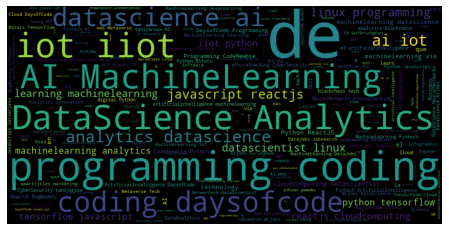

In [ ]:
generate_wordcloud(all_words_str)

In [ ]:
!apt-get install fonts-nanum*
!apt-get install fontconfig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 12 not upgraded.
Need to get 37.0 MB of archives.
After this operation, 145 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-eco all 1.000-6 [14

In [ ]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
def generate_wordcloud_korean(text): 
    wordcloud = WordCloud(
                          font_path = FONT_PATH,
                          width=800, height=400,
                          relative_scaling = 1.0,
                          stopwords = {'to', 'of'} #제거하고 싶은 단어를 여기에 입력
                          ).generate(text)
    
    fig = plt.figure(1, figsize=(8, 4))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.axis("off")

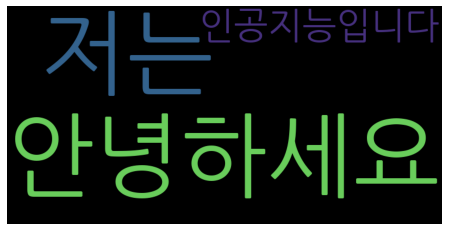

In [ ]:
generate_wordcloud_korean("안녕하세요. 저는 인공지능입니다.")

# 감성분석

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download([ "stopwords",  "vader_lexicon"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = stopwords.words('english')
print(stop_words)
stop_words.extend(["rt"]) ###여기서  필요한 stopwords추가
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

sentiment analysis check

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Wow, NLTK is really powerful!")

{'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.8012}

# (option) 한국어로 간단하게 감성분석 하는 방법:google Translate

In [ ]:
!pip install googletrans==4.0.0-rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from googletrans import Translator
translator = Translator()
original_text = '안녕하세요. 역시 파이썬은 너무 좋네요'
translations = translator.translate(original_text, 'en')
print(original_text)
print(translations.text)
translated_text = translations.text

sia = SentimentIntensityAnalyzer()
sia.polarity_scores(translated_text)

안녕하세요. 역시 파이썬은 너무 좋네요
hello.After all, Python is so good


{'neg': 0.0, 'neu': 0.572, 'pos': 0.428, 'compound': 0.5777}

# 데이터셋 전체에 대해서 Sentiment Analysis 실행

In [ ]:
sentiment_result = []

for tweet in df.content:
  cleaned_tweet = []
  cleaned_tweet_string = CleanText(tweet, Num=True, Eng=False)
  tweet_tokens = word_tokenize(cleaned_tweet_string)
  for token in tweet_tokens:
    if token.lower() not in stop_words:
      cleaned_tweet.append(token)

  cleaned_tweet_str = ' '.join(cleaned_tweet)
  print("전처리 전: " + tweet)
  print("전처리 후: " + cleaned_tweet_str)
  print(sia.polarity_scores(cleaned_tweet_str))

  #positive or negative 분류 compound score가 0 보다 크면 positive, 이하는 negative로 함
  compound_point = sia.polarity_scores(cleaned_tweet_str)['compound']
  if compound_point > 0:
    sentiment_result.append('Positive')

  else:
    sentiment_result.append('Negative')

감성분석의 시각화

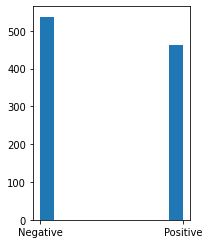

In [ ]:
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [3.0, 3.50]
plt.rcParams["figure.autolayout"] = True

# Plot bar chart with data points
plt.hist(sentiment_result)

# Display the plot
plt.show()

# Topic Analysis

In [ ]:
!pip install gensim
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
import gensim
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaSeqModel, LdaModel

In [ ]:
cleaned_tweets_all = []

for tweet in df.content:
  cleaned_tweet = []
  cleaned_tweet_string = CleanText(tweet, Num=True, Eng=False)
  tweet_tokens = word_tokenize(cleaned_tweet_string)
  for token in tweet_tokens:
    if token.lower() not in stop_words:
      cleaned_tweet.append(token)

  # print("---------------------")
  # print("전처리 전:", word_tokenize(tweet))
  # print("전처리 후:", cleaned_tweet)
  # print("---------------------")
  cleaned_tweets_all.append(cleaned_tweet)

In [ ]:
id2word = Dictionary(cleaned_tweets_all)
corpus = [id2word.doc2bow(text) for text in cleaned_tweets_all]

In [ ]:
topic_number = 10 #10개의 topic group로 나눔

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=topic_number,
                                                random_state=100,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)

In [ ]:
for topic_topwords in lda_model.print_topics():
  print(topic_topwords)

(0, '0.054*"bigdata" + 0.040*"data" + 0.039*"datascience" + 0.037*"analytics" + 0.033*"machinelearning" + 0.033*"ai" + 0.024*"tech" + 0.022*"programming" + 0.021*"iot" + 0.020*"python"')
(1, '0.032*"daysofcode" + 0.021*"Marketing" + 0.012*"Infographic" + 0.011*"digitalarts" + 0.011*"ios" + 0.011*"iosdev" + 0.011*"MarketingDigital" + 0.010*"intelligence" + 0.010*"AndroidDev" + 0.009*"artificial"')
(2, '0.096*"Data" + 0.066*"Big" + 0.014*"Learning" + 0.013*"Java" + 0.011*"BigData" + 0.010*"Engineer" + 0.007*"us" + 0.007*"Analytics" + 0.007*"data" + 0.006*"BI"')
(3, '0.057*"data" + 0.036*"big" + 0.035*"coding" + 0.014*"startup" + 0.010*"NFT" + 0.009*"presentation" + 0.009*"Twitter" + 0.009*"insights" + 0.009*"startups" + 0.008*"time"')
(4, '0.041*"BigData" + 0.032*"learning" + 0.029*"via" + 0.023*"machinelearning" + 0.021*"iiot" + 0.018*"cloud" + 0.016*"Read" + 0.014*"SEO" + 0.013*"data" + 0.012*"bigdata"')
(5, '0.051*"BigData" + 0.051*"AI" + 0.047*"DataScience" + 0.040*"MachineLearning" 

# 향후 방향


*   본인이 조사 하고 싶은 key word를 정해서 분석
*   년도별, 월별의 변화를 관찰

*   토픽별 감성 비교
*   여러개의 key word를 사용해서 결과 비교 (Ex, galaxy vs iphone) 





# 참고자료


*   https://www.nltk.org/
*   https://radimrehurek.com/gensim/

*   https://huggingface.co/ (for Deep Learning Models in NLP)
*   https://en.wikipedia.org/wiki/Word_embedding (Word Embedding 는 현재 NLP에서의 핵심 기술)



